Unique Classes in Encoded Labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       1.00      1.00      1.00         4
           3       0.67      1.00      0.80         2
           4       0.75      0.50      0.60         6
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1

c:\Users\Akshay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Akshay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Akshay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Feature Importance:
[1.]


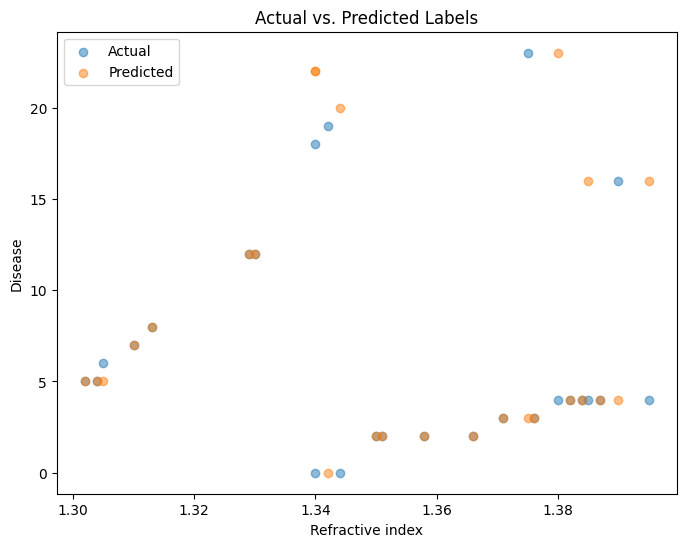

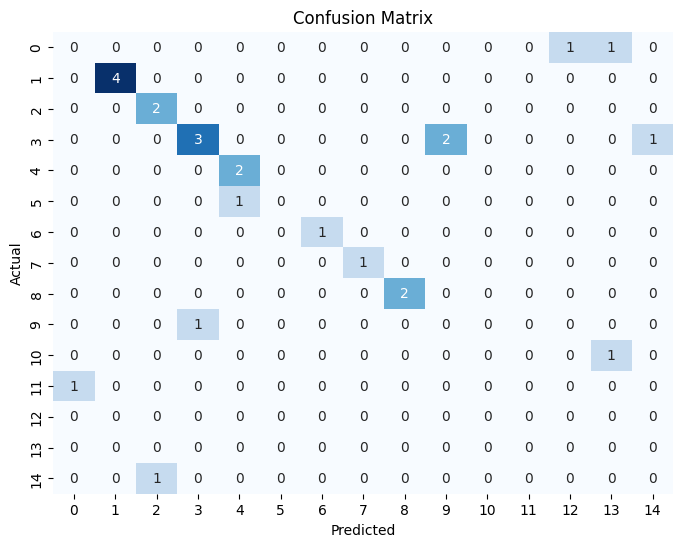

KeyError: 'Refractive index'

<Figure size 800x600 with 0 Axes>

In [15]:
# Import necessary libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('your_dataset.csv')

# Data Preprocessing
data.dropna(inplace=True)
data.columns = data.columns.str.strip()

# Encode the target column
label_encoder = LabelEncoder()
y_encoded= label_encoder.fit_transform(data['Disease'])


# Check the unique classes in the encoded labels
print("Unique Classes in Encoded Labels:", sorted(pd.Series(y_encoded).unique()))

# Select features and target variable
X = data[['Refractive Index']]
y = pd.Series(y_encoded, name='Disease')

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

# Hyperparameter Tuning (optional)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Feature Importance
print("Feature Importance:")
print(best_model.feature_importances_)

# Visualize Results
plt.figure(figsize=(8, 6))

# Plotting Actual vs. Predicted Labels
plt.scatter(X_test, y_test, label='Actual', alpha=0.5)
plt.scatter(X_test, y_pred, label='Predicted', alpha=0.5)
plt.xlabel('Refractive index')
plt.ylabel('Disease')
plt.legend()
plt.title('Actual vs. Predicted Labels')
plt.show()

# Plotting Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Boxplot of Refractive index
plt.figure(figsize=(8, 6))
plt.boxplot(data['Refractive index'], vert=False)
plt.xlabel('Refractive index')
plt.title('Boxplot of Refractive index')
plt.show()
